# Gather data, determine the method of data collection and provenance of the data

I'm interest in working with data from counselchat.com, which involves individuals seeking assitance from licensed therapists and their responses. This dataset aims to provide a high-quality open source collection of counseling responses.

## Data Collection and Provenance
* **Source**: The data is sourced from counselchat.com, a platform where individuals can seek assistance from licensed therapists.
* **Collection Method**: Data scraping techniques were used to gather the questions asked by individuals and the responses provided by licensed therapists. This method involved programmatically accessing the website and extracting relevant information.
* **Data Provenance**: Nicolas Beertagnolli documented the process and made the dataset available through GitHub with a detailed write-up on Medium. The dataset can be accessed [here on GitHub](https://github.com/nbertagnolli/counsel-chat).

In [ ]:
!pip install vaderSentiment
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
from bs4 import BeautifulSoup
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizer_v1 import Adam
from tensorflow.python.keras.optimizers import adam_v2
from transformers import BertTokenizer, TFBertForSequenceClassification
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import keras
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import tensorflow as tf
import tensorflow.keras

In [ ]:
# Define a function to get the sentiment category
def get_sentiment_category(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Function to clean text data
def clean_text(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)

    return text

# Function that builds the model, here using BERT for simplicity
def build_model(hp):
  # Load the pre-trained BERT model with variable sequence length
  model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = len(np.unique(train_labels)))

  # Compile the model
  model.compile(optimizer = 'adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])

  return model

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/counselchat-data.csv')

In [ ]:
# Displaying the first few rows of the dataframe to understand its structure
df.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0


The dataset from counselchat.com contains several key columns that provide a wealth of information for analysis:

* **questionID**: A unique identifier for each question.
* **questionTitle**: A brief title summarizing the question.
* **questionText**: The full text of the question asked by the individual seeking help.
* **questionUrl**: The URL to the question on the CounselChat website.
* **topics**: The main topics or categories the question falls under.
* **therapistName**: The name of the therapist who provided a response.
* **therapistUrl**: The URL to the therapist's profile on the CounselChat website.
* **answerText**: The full text of the therapist's response.
* **upvotes**: The number of upvotes the answer received.

# Identify a Deep Learning Problem

Based on the data from counselchat.com, my project idea is to detect emotional tone from the therapy texts.

## Objective:

Develop a deep learning model to detect the emotional tone (e.g., positive, negative, neutral) of the questions asked by individuals seeking help and the responses provided by therapists. This project goes beyond simple sentiment analysis by categorizing texts into more nuanced emotional tones, which are crucial in understanding the emotional state of individuals seeking help and the empathetic quality of therapists' responses.

## Deep Learning Problem Statement:

The problem is framed as a multi-class text classification challenge, where the input is a text (question or answer), and the output is the emotional tone category.

## Dataset:

Using the counselchat.com dataset, sepcifically, the ```questionText``` and ```answeText``` fields, to train and evaluate the model. The dataset needs to be annotated with emotional tones, which can be done using an existing sentiment analysis tool for initial labels, followed by manual review/correction to ensure accuracy and introduce nuanced emotional tones.

## Methodology:
1. **Data Preprocessing**:
      * Annotate or label the dataset with emotional tones.
      * Clean text data.
      * Split the dataset into training, validation, and test sets.
2. **Model Building**:
      * Use a pre-trained language model as the base for transfer learning.
      * Fine-tune the pre-trained model on my dataset to adapt it to the task of emotional tone detection.
3. **Experimentation**:
      * Compare the performance of different pre-trained models to find the best fit for the problem.
      * Experiment with different configurations of the neural network (e.g., number of layers, dropout rates) and training parameters (e.g., learning rate, batch size).
4. **Evaluation**:
      * Use metrics such as accuracy, F1-score, and confusion matrix to evaluate the model's performance on the test set.
      * Analyze misclassifications to understand the model's limitations and areas for improvement.
  
Now, let's annotate the dataset with emotional tones.

In [ ]:
# Convert questionText and answerText columns to strings to avoid TypeError
df['questionText'] = df['questionText'].astype(str)
df['answerText'] = df['answerText'].astype(str)

In [ ]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

In [ ]:
# Apply the function to question and answer texts
df['questionSentiment'] = df['questionText'].apply(get_sentiment_category)
df['answerSentiment'] = df['answerText'].apply(get_sentiment_category)

In [ ]:
# Display the first few rows to verify the results
df[['questionText', 'questionSentiment', 'answerText', 'answerSentiment']].head()

,questionText,questionSentiment,answerText,answerSentiment
0,My wife and mother are having tense disagreeme...,negative,<p>What you are describing is something psycho...,negative
1,"I'm planning to have baby, so I have to quit s...",negative,<p>Hi. Good for you in planning ahead to do wh...,positive
2,"I have secrets in my mind, and I don't know wh...",negative,<p>It sounds like keeping the secrets has beco...,positive
3,I am extremely possessive in my relationships ...,negative,<p>Hi there. It's great you are able to realiz...,positive
4,I had a head injury a few years ago and my min...,negative,<p>You didn't say what or how many medications...,positive


Next, we will clean the data.

In [ ]:
# Clean the answerText column
df['cleanedAnswerText'] = df['answerText'].apply(clean_text)

In [ ]:
# Display the first few rows to verify the cleaning
df[['answerText', 'cleanedAnswerText']].head()

,answerText,cleanedAnswerText
0,<p>What you are describing is something psycho...,what you are describing is something psycholog...
1,<p>Hi. Good for you in planning ahead to do wh...,hi good for you in planning ahead to do whats ...
2,<p>It sounds like keeping the secrets has beco...,it sounds like keeping the secrets has become ...
3,<p>Hi there. It's great you are able to realiz...,hi there its great you are able to realize the...
4,<p>You didn't say what or how many medications...,you didnt say what or how many medications you...


## EDA Procedure Overview

1. **Describe the Features (Factors) in the Dataset**:
      * For each feature, summarize its characteristics using statistical measures.
      * We will use visualizations like histograms for numeric data to understand the distribution, box-plots to identify outliers, and bar charts for categorical data to see the frequency of each category.

In [ ]:
# Convert 'upvotes' to numeric and handle any conversion errors by setting errors = 'coerce'
df['upvotes'] = pd.to_numeric(df['upvotes'], errors = 'coerce')

In [ ]:
# Overview of dataset
print(df.describe())

       upvotes
count   1482.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0


Based on the summary statistics for the ```upvotes``` feature I've shown above, it appears that all values in this column are 0.

1. **Uniformity of the ```upvotes``` Feature**:
    * Since the ```upvotes``` feature has a mean, minimum, maximum, and all quartiles at 0, it indicates that there is no variation in this feature across the dataset.
2. **Considerations for Model Building**:
    * When building predictive models, features that lack variability can be removed as they do not contribute to the model's ability to learn or make predictions.
3. **Next Steps**:
    * Given this information, it would be beneficial to focus on other aspects of the dataset for EDA and modeling.

In summary, the uniformity of the ```upvotes``` feature suggest shifting focus to other features within our dataset for meaningful analysis and model development.

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)


Missing values per column:
 questionID            0
questionTitle         2
questionText          0
questionUrl           0
topics               10
therapistName         0
therapistUrl          0
answerText            0
upvotes               0
questionSentiment     0
answerSentiment       0
cleanedAnswerText     0
dtype: int64


Given the information on missing values in our dataset, we have a few instances of missing data in the ```questionTitle``` and ```topics``` columns. Here's how we will address these missing values based on the nature of each column:

1. **Removal**: Given that only 2 entries are missing titles, and considering the dataset is large enough, removing these records will have a negligible impact on our analysis and modeling.
2. **Categorical Imputation**: We could do a detailed imputation but the topics are too diverse for simple keyword matching, so we will impute a generic category like "Miscellaneous" or "Various" to indicate a mix of topics or unspecified topics.

In [ ]:
df['topics'].fillna('Miscellaneous', inplace = True)
df.dropna(subset = ['questionTitle', 'topics'], inplace = True)

<ipython-input-22-c4813da11f06>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'questionSentiment', data = df, palette = 'coolwarm')
<ipython-input-22-c4813da11f06>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'answerSentiment', data = df, palette = 'coolwarm')


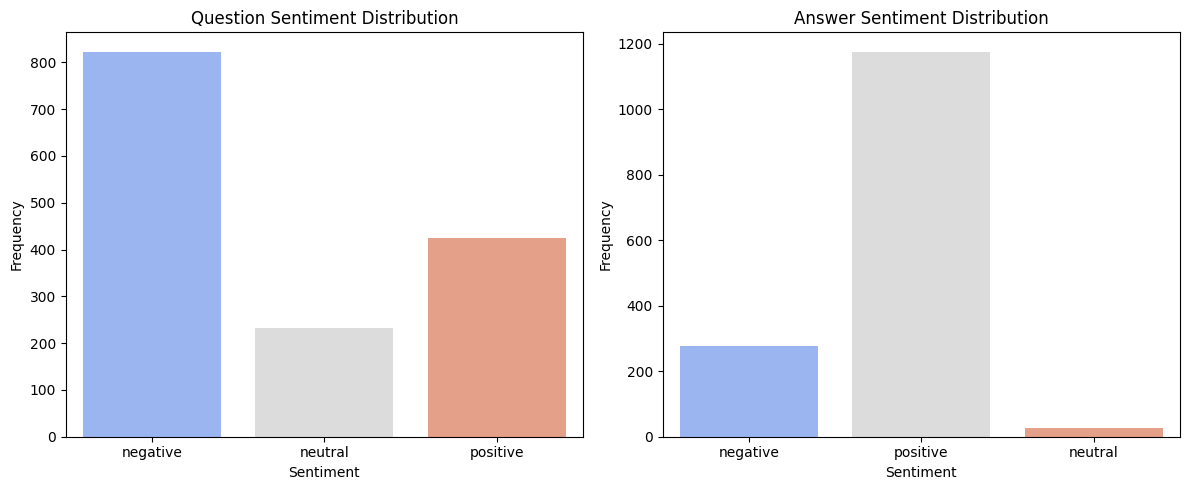

In [ ]:
# Visualizing the distribution of sentiments for questions and answers
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x = 'questionSentiment', data = df, palette = 'coolwarm')
plt.title('Question Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x = 'answerSentiment', data = df, palette = 'coolwarm')
plt.title('Answer Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From the sentiment distribution bar charts, it appears that:

* The sentiment in the questions is predominantly negative, which is expected as people often seek counseling for challenges or issues they are facing.
* The answers show a different distribution, what positive sentiments being predominant. This might reflect the therapists' efforts to considered responses that acknowledge the concerns raised by the questioners offering positive reinforcement.

These insights can help understand the general tone and emotion content of the counseling sessions.

<ipython-input-23-4eb2d39f9679>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = topics_count.index, y = topics_count.values, palette = 'viridis')


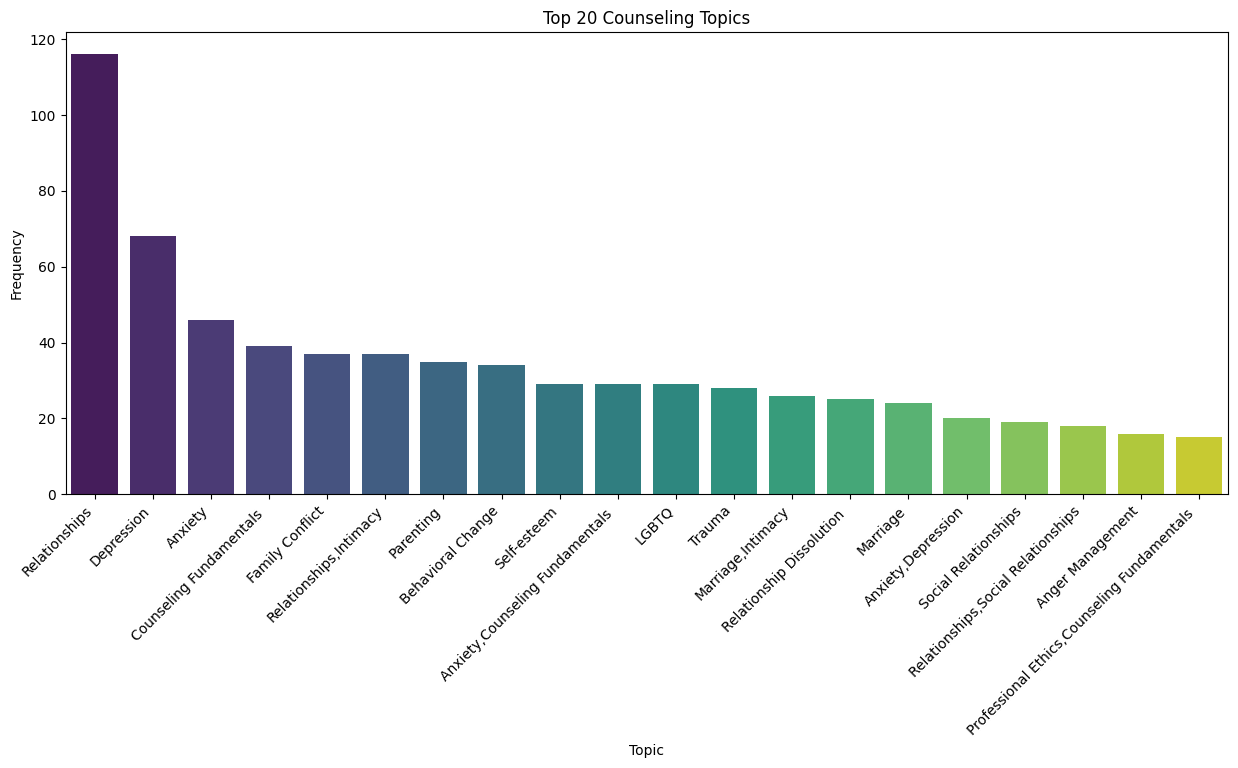

In [ ]:
# Visualizing the frequency of topics
plt.figure(figsize = (15, 6))
topics_count = df['topics'].value_counts().head(20)
sns.barplot(x = topics_count.index, y = topics_count.values, palette = 'viridis')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Top 20 Counseling Topics')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()

The topics bar chart above effectively showcases the top 20 counseling topics based on their frequency in the dataset. From the chart, it appears that "Relationships", "Depression", and "Anxiety" are the most frequently discussed topics, which is not uncommon in counseling settings.

This kind of visualization is beenficial for several reasons:

1. **Identifying Key Areas of Focus**: Understanding the most common topics can help counselors and mental health professionals to prepare resources and training that are aligned with the needs of the people they are helping.
2. **Resource Allocation**: For counseling services, such insights can inform how to allocate resources effectively, such as hiring specialists in areas with higher demand.
3. **Trend Analysis**: Over time, tracking these topics can reveal shifts in the cornerns being brought to counseling, which could be reflective of broader social changes or seasonal trends.

Now, let's split the dataset into training, validation, and test sets.

In [ ]:
# First, split the data into training and a temporary holdout set
train_df, temp_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [ ]:
# Then, split the temporary set into validation and test sets
validation_df, test_df = train_test_split(temp_df, test_size = 0.5, random_state = 42)

In [ ]:
# We can verify the sizes of each dataset by checking their shape
print(f"Training Set Shape: {train_df.shape}")
print(f"Validation Set Shape: {validation_df.shape}")
print(f"Test Set Shape: {test_df.shape}")

Training Set Shape: (1184, 12)
Validation Set Shape: (148, 12)
Test Set Shape: (148, 12)


In [ ]:
# Preprocess and training with BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize and encode sequences in the training set
texts = train_df['questionText'].tolist()
inputs = tokenizer(texts, max_length = 128, truncation = True, padding = 'max_length', return_tensors = 'tf')

In [ ]:
# Train the model
model.compile(optimizer = 'adam', loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])
labels = train_df['questionSentiment'].unique().tolist()
label_to_index = {label: idx for idx, label in enumerate(labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}
train_labels = train_df['questionSentiment'].map(label_to_index).values
model.fit(inputs['input_ids'], train_labels, epochs = 3, batch_size = 16)

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
74/74 [==============================] - 2096s 26s/step - loss: 8.8003 - accuracy: 0.1655
Epoch 2/3
74/74 [==============================] - 1750s 24s/step - loss: 8.7812 - accuracy: 0.1537
Epoch 3/3
70/74 [===========================>..] - ETA: 1:34 - loss: 8.7232 - accuracy: 0.1536

In [ ]:
# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(train_df['questionText']), truncation = True, padding = True, max_length = 128, return_tensors = 'tf')
validation_encodings = tokenizer(list(validation_df['questionText']), truncation = True, padding = True, max_length = 128, return_tensors = 'tf')

In [ ]:
# Convert these to a numeric form, e.g., 0, 1, 2
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['questionSentiment'])
validation_labels = label_encoder.transform(validation_df['questionSentiment'])
train_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

In [ ]:
# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective = 'val_accuracy',
    max_epochs = 10,
    hyperband_iterations = 2,
    directory = 'my_drive',
    project_name = 'bert_tuning'
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Start the search to find the best hyperparameter configuration
tuner.search(
    x = {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    y = train_labels,
    epochs = 10,
    validation_data = (
        {'input_ids': validation_encodings['input_ids'], 'attention_mask': validation_encodings['attention_mask']},
        validation_labels
    ),
    verbose = 2
)

In [ ]:
# Create a callback to stop training early after reaching a certain value for the validation loss
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
validation_labels

array([0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1,
       1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0])

In [ ]:
history = model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    train_labels,
    validation_data=(
        {'input_ids': validation_encodings['input_ids'], 'attention_mask': validation_encodings['attention_mask']},
        validation_labels
    ),
    epochs=3,
    batch_size=16


Epoch 1/3
74/74 [==============================] - 1925s 25s/step - loss: 1.0536 - accuracy: 0.5541 - val_loss: 1.1611 - val_accuracy: 0.5203
Epoch 2/3
74/74 [==============================] - 1847s 25s/step - loss: 1.0043 - accuracy: 0.5608 - val_loss: 0.9945 - val_accuracy: 0.5203
Epoch 3/3
74/74 [==============================] - 1829s 25s/step - loss: 1.0070 - accuracy: 0.5389 - val_loss: 1.0727 - val_accuracy: 0.5203


The results from training the ```TFBErtForSequenceClassification``` model for 3 epochs show some key points to discuss. I achieved a training accuracy of approximatey 55.41% in the first epoch, which slightly improved to 56.08% in the second epoch but then dropped to 53.89% in the third epoch. The validationa accuracy remained constant at 52.03% across all epochs. Let's interpret these results and explore potential improvements.

## Interpretation of Results:

* **Stable Validation Accuracy**: The constant validation accuracy suggests that the model might have quickly reached its learning capacity for the given architecture and dataset. It could also indicate that the model is not effectively learning from the training data beyond a certain point, possibly due to the complexity of the task or limitations in the data.
* **Accuracy Plateau**: The slight improvement in training accuracy from the first to the second epoch, followed by a decrease, indicates that the model might be struggling to generalize from the training data. This could be a sign of overfitting, where the model learns specifics of the training data that do not generalize to unseen data, or it could suggest that the model's capacity is not adequate to capture the underlying patterns in the data.

## Learnings and Takeaways:

* **Model Complexity**: BERT is a highly complex model with a large number of paramters. If the dataset is relatively small, the model might not train as effectively as expected.
* **Hyperparameter Tuning**: The learning rate and batch size are crucial hyperparameters that can significantly affect model performance.
* **Data Quality and Quantity**: More data, especially if it's diverse and representative of the problem space, generally leads to better performance.

## What Did and Did Not Help:
It's clear that simply applying a pre-trained BERT model to the task did not yield high accuracy. This might be due to factors like inadequate hyperparameter tuning, insufficient training data, or the need for more task-specific model adjustments.

## Future Improvements:
* **Fine-Tuning and Experimentation**: More extensive hyperparameter tuning, including experimenting with different optimizers and learning rate schedules, might yield improvements.
* **Data Augmentation**: Exploring techniques for data augmentation specific to NLP, such as synonym replacement, back-translation, or using pre-trained embeddings to find similar sentences, could enhance the training dataset.
* **Alternative Models**: While BERT is powerful, other models like RoBERTa, ALBERT, or even small, more efficient models like DistilBERT might perform better on my specific task due to differences in pre-training data and objectives.

## Conclusion:
The training exercise provided valuable insights into the complexities of fine-tuning pre-trained models for specific tasks.